# Ch10_2.계층적 군집분석

## 1.기본 package 설정

In [1]:
## 기본
import numpy as np  # numpy 패키지 가져오기
import pandas as pd # pandas 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기

## 데이터 전처리
from sklearn.preprocessing import StandardScaler # 연속변수의 표준화


## 2.데이터 가져오기

### 2.1 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [2]:
utilities_df = pd.read_csv('Utilities.csv')
utilities_df.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


In [3]:
utilities_df.shape

(22, 9)

In [4]:
# 자료구조 살펴보기
utilities_df.keys()

Index(['Company', 'Fixed_charge', 'RoR', 'Cost', 'Load_factor',
       'Demand_growth', 'Sales', 'Nuclear', 'Fuel_Cost'],
      dtype='object')

## 3.데이터 전처리

### 3.1 회사이름을 row 이름으로 변경

In [5]:
columns = ['Fixed_charge', 'RoR', 'Cost', 'Load_factor', 'Demand_growth', 'Sales', 'Nuclear', 'Fuel_Cost']
columns

['Fixed_charge',
 'RoR',
 'Cost',
 'Load_factor',
 'Demand_growth',
 'Sales',
 'Nuclear',
 'Fuel_Cost']

In [6]:
labels = np.array(utilities_df['Company'])
labels

array(['Arizona ', 'Boston ', 'Central ', 'Commonwealth', 'NY',
       'Florida ', 'Hawaiian ', 'Idaho', 'Kentucky', 'Madison ', 'Nevada',
       'New England', 'Northern', 'Oklahoma', 'Pacific ', 'Puget',
       'San Diego', 'Southern', 'Texas', 'Wisconsin', 'United',
       'Virginia'], dtype=object)

In [7]:
utilities_df = utilities_df.drop(['Company'], axis=1)
utilities_df

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,1.49,8.8,192,51.2,1.0,3300,15.6,2.044
5,1.32,13.5,111,60.0,-2.2,11127,22.5,1.241
6,1.22,12.2,175,67.6,2.2,7642,0.0,1.652
7,1.10,9.2,245,57.0,3.3,13082,0.0,0.309
8,1.34,13.0,168,60.4,7.2,8406,0.0,0.862
9,1.12,12.4,197,53.0,2.7,6455,39.2,0.623


### 3.2 수치형 데이터 표준화 

In [8]:
stdsc = StandardScaler()
utilities_df = pd.DataFrame(stdsc.fit_transform(utilities_df))

In [9]:
utilities_df.index = labels
utilities_df.columns = columns

### 3.3 회사명 레이블 연결

In [10]:
utilities_df

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Arizona,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765
Boston,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436
Central,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323
Commonwealth,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244
NY,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470
Florida,1.142233,1.260521,-1.420868,0.693512,-1.785921,0.638040,0.640016,0.254499
Hawaiian,0.587506,0.667579,0.169420,2.437200,-0.341667,-0.366757,-0.731447,1.010970
Idaho,-0.078166,-0.700750,1.908797,0.005214,0.019396,1.201706,-0.731447,-1.460904
Kentucky,1.253178,1.032466,-0.004518,0.785285,1.299530,-0.146480,-0.731447,-0.443073
Madison,0.032779,0.758801,0.716081,-0.912516,-0.177548,-0.708993,1.657945,-0.882967


## 4.거리계산

In [11]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(utilities_df, 
                                         metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Arizona,0.000000,3.169015,3.765812,2.520090,4.220157,3.691134,3.993720,2.801825,3.330423,3.172047,...,4.052817,2.163226,2.654513,4.127959,4.500146,1.921424,2.467158,3.249192,3.534675,2.568337
Boston,3.169015,0.000000,5.032163,2.215142,3.943517,4.318084,3.529495,3.984125,4.050246,2.768993,...,3.515710,4.425576,2.560054,4.950880,3.708860,2.972757,4.743949,3.068020,2.373011,2.478910
Central,3.765812,5.032163,0.000000,4.203729,4.573896,3.063188,4.317024,5.108325,2.817399,4.027535,...,4.489187,2.806526,5.278335,5.388328,6.506135,2.788056,3.254211,3.821128,5.207752,4.206024
Commonwealth,2.520090,2.215142,4.203729,0.000000,4.224495,3.277184,4.062776,3.779854,3.841959,1.526524,...,2.637646,3.306082,3.265325,5.084136,5.008841,2.713930,3.545692,1.859211,3.975667,2.639141
NY,4.220157,3.943517,4.573896,4.224495,0.000000,4.708438,4.704423,5.276839,4.595559,4.140472,...,4.870028,4.932202,4.355388,5.953597,5.761047,4.440238,5.254603,4.489063,3.729893,3.860516
Florida,3.691134,4.318084,3.063188,3.277184,4.708438,0.000000,3.431822,5.029591,3.818610,3.919166,...,4.662098,3.550909,4.161442,5.979752,6.242992,2.921102,2.641951,2.980937,4.737258,4.121700
Hawaiian,3.993720,3.529495,4.317024,4.062776,4.704423,3.431822,0.000000,4.467217,2.862102,4.612562,...,5.128124,5.030610,2.999096,5.161106,4.685009,3.018404,4.621687,3.625281,2.738363,4.094229
Idaho,2.801825,3.984125,5.108325,3.779854,5.276839,5.029591,4.467217,0.000000,3.679419,3.760340,...,4.238047,4.437261,3.940469,2.253263,5.554211,3.313593,4.204637,4.190632,4.070722,3.315605
Kentucky,3.330423,4.050246,2.817399,3.841959,4.595559,3.818610,2.862102,3.679419,0.000000,3.656082,...,3.744745,3.906254,4.210410,3.712667,5.016372,2.485683,4.205746,3.017396,3.830755,3.284446
Madison,3.172047,2.768993,4.027535,1.526524,4.140472,3.919166,4.612562,3.760340,3.656082,0.000000,...,1.440143,3.695231,4.364479,4.638057,5.613603,3.143013,4.227313,2.102738,4.464609,2.620187


## 5.군집화

In [12]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(utilities_df.values, 
                       method='complete', 
                       metric='euclidean')

pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      '거리', '클러스터 샘플 갯수.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,거리,클러스터 샘플 갯수.
cluster 1,11.0,20.0,1.416696,2.0
cluster 2,9.0,12.0,1.440143,2.0
cluster 3,3.0,19.0,1.859211,2.0
cluster 4,13.0,18.0,1.920200,2.0
cluster 5,0.0,17.0,1.921424,2.0
cluster 6,7.0,15.0,2.253263,2.0
cluster 7,14.0,22.0,2.383636,3.0
cluster 8,1.0,21.0,2.478910,2.0
cluster 9,25.0,26.0,2.531909,4.0
cluster 10,23.0,24.0,2.637646,4.0


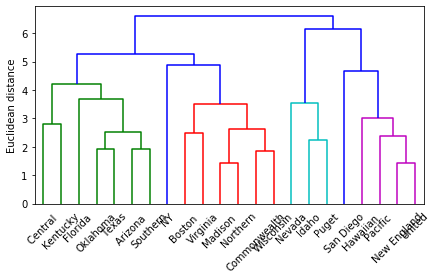

In [13]:
from scipy.cluster.hierarchy import dendrogram

dendr = dendrogram(row_clusters,
                   labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(utilities_df)
print('클러스터 레이블: %s' % labels)

클러스터 레이블: [0 0 0 0 0 0 1 2 0 0 2 1 0 0 1 2 1 0 0 0 1 0]
